## Ejercicio Series Series de Tiempo
## Curso Ingeniería de Datos Masivos
## Tec Milenio

In [ ]:
# importando librerías
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# leyendo datos
data = pd.read_csv("/content/drive/MyDrive/Archivos csv/sales-of-shampoo.csv")

data.head()

,Month,Sales
0,2011-01-01,266.0
1,2011-02-01,145.9
2,2011-03-01,183.1
3,2011-04-01,119.3
4,2011-05-01,180.3


In [ ]:
#Convirtiendo a fechas y poniendo índice de fechas



In [ ]:
# describiendo datos


In [ ]:
serie_tiempo = data['Sales']
serie_tiempo.head()

0    266.0
1    145.9
2    183.1
3    119.3
4    180.3
Name: Sales, dtype: float64

### 1. Checar la estacionalidad de la Serie de Tiempo

Un Serie de Tiempo es estacionaria si sus propiedades estadísticas como la media, la varianza permanecen constantes en el tiempo y una autocovarianza que no depende del tiempo.

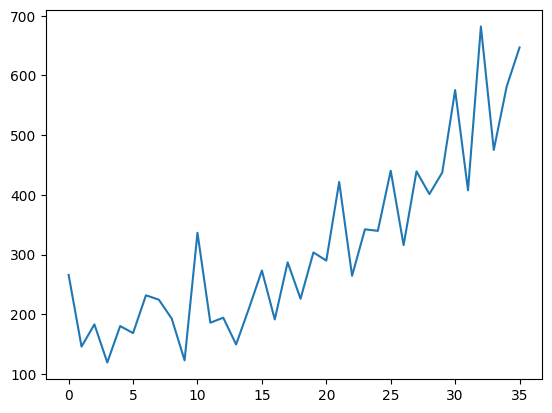

In [ ]:
plt.plot(serie_tiempo)
plt.show()

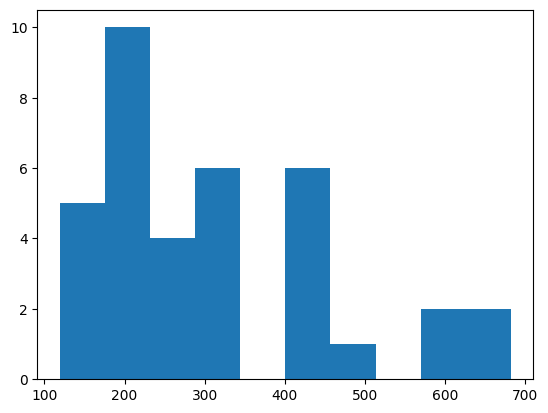

In [ ]:
# Histograma de los datos
plt.hist(serie_tiempo)
plt.show()

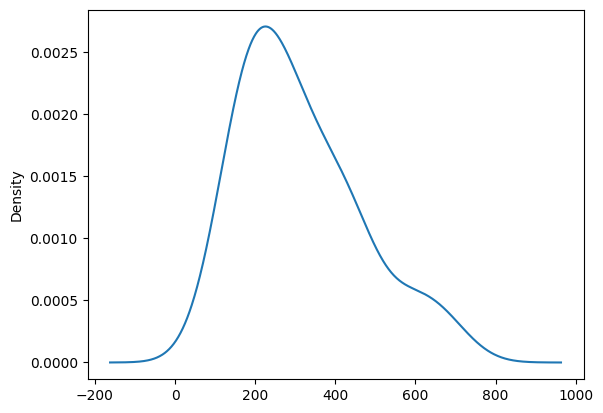

In [ ]:
# Estimación de la función de distribución de probabilidad

#La densidad de probabilidad es la relación entre las observaciones y su probabilidad.

#Algunos resultados de una variable aleatoria tendrán baja densidad de probabilidad y
#otros resultados tendrán una alta densidad de probabilidad.

# Es útil conocer la función de densidad de probabilidad  de datos
# para saber si una observación dada es improbable, tan improbable como para considerarse un valor atípico o una anomalía
# y si debe eliminarse.

serie_tiempo.plot(kind = 'kde')
plt.show()

In [ ]:
def test_stationarity(timeseries):

    #Determining rolling statistics
    rolmean = timeseries.rolling(window = 3).mean()
    rolstd = timeseries.rolling(window = 3).std()

    #plotting rolling statistics
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    st = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title('Rolling  Mean & Standard Deviation')
    plt.show()


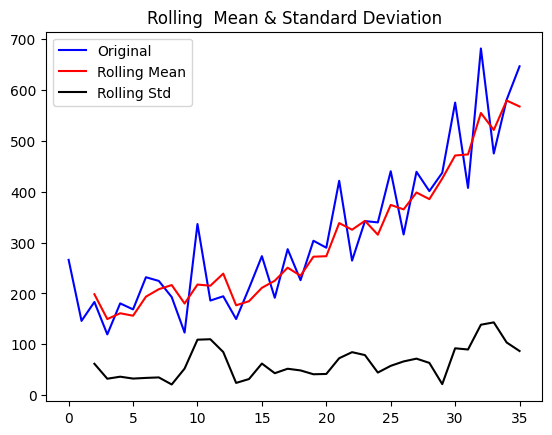

In [ ]:
test_stationarity(serie_tiempo)

La desviación estándar tiene una variación muy menor, pero la media aumenta continuamente. Por lo tanto, no es una serie estacionaria.

### 2. Hacer la Serie de Tiempo Estacionaria

In [ ]:
# Aplicando logaritmo

#### Promedios móviles


In [ ]:
# Agrega tu código de promedios móviles


### 3. Eliminando Tendencia y Estacionalidad

In [ ]:
# Agrega aqupi tu código para hacer descomposición


### Haciendo Pronóstico con Series de Tiempo

In [ ]:
#ACF plot
#pd.plotting.autocorrelation_plot()
#plt.show()
import numpy as np
serie_tiempo_log_diff = np.log(serie_tiempo)

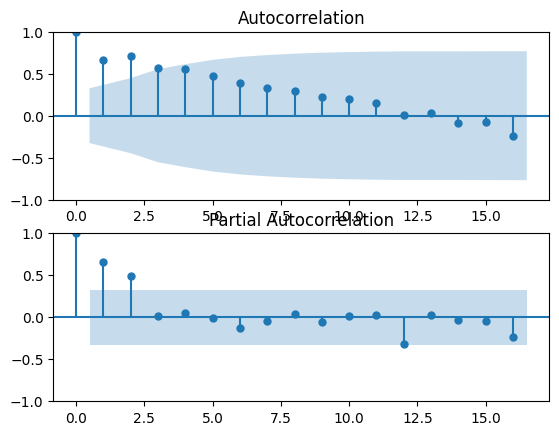

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

plt.subplot(211)
plot_acf(serie_tiempo_log_diff, ax=plt.gca())
plt.subplot(212)
plot_pacf(serie_tiempo_log_diff, ax=plt.gca())
plt.show()

In [ ]:
#Another method
#ACF and PACF plots
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(serie_tiempo_log_diff, nlags=3)
lag_pacf = pacf(serie_tiempo_log_diff, nlags=3, method='ols')

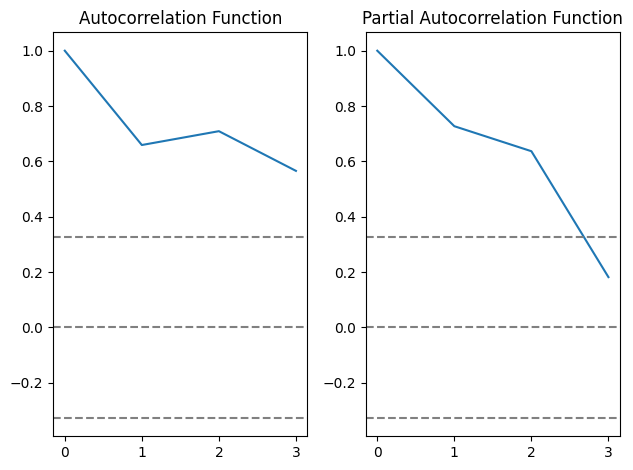

In [ ]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'gray') #Add a horizontal line across the axis at y = 0.
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle = '--', color = 'gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'gray')
plt.axhline(y = -1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.axhline(y = 1.96/np.sqrt(len(serie_tiempo_log_diff)), linestyle='--', color = 'gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout() #Automatically adjust subplot parameters to give specified padding.

In [ ]:
from statsmodels.tsa.arima_model import ARIMA, ARMAResults

#### AR Model

In [ ]:
serie_tiempo_log = np.log(serie_tiempo)
serie_tiempo_log

0     5.583496
1     4.982921
2     5.210032
3     4.781641
4     5.194622
5     5.126936
6     5.445875
7     5.413876
8     5.261653
9     4.811371
10    5.818598
11    5.225209
12    5.269403
13    5.007296
14    5.347584
15    5.610570
16    5.254365
17    5.659482
18    5.420535
19    5.715711
20    5.669536
21    6.044057
22    5.577841
23    5.835688
24    5.828063
25    6.087683
26    5.755426
27    6.085183
28    5.994709
29    6.080848
30    6.355239
31    6.010286
32    6.525030
33    6.163946
34    6.365267
35    6.472192
Name: Sales, dtype: float64

In [ ]:
model = ARIMA(serie_tiempo_log.columnName, order = (1,0,0))
results_AR = model.fit(disp = -1)
plt.plot(serie_tiempo_log_diff)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - serie_tiempo_log_diff)**2))
plt.show()

AttributeError: ignored

#### MA Model

In [ ]:
#model = ARIMA(serie_tiempo_log, order= (,,))
#results_MA = model.fit(disp = -1)
#plt.plot(serie_tiempo_log_diff)
#plt.plot(results_MA.fittedvalues, color= 'red')
#plt.title('RSS: %.4f'% sum((results_MA.fittedvalues - serie_tiempo_log_diff)**2))
#plt.show()

#### Model Combinado

In [ ]:
#model = ARIMA(serie_tiempo_log, order = (,,))
#results_ARIMA = model.fit(disp = -1)
#plt.plot(serie_tiempo_log_diff)
#plt.plot(results_ARIMA.fittedvalues, color= 'red')
#plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues - serie_tiempo_log_diff)**2))
#plt.show()

Los modelos AR y MA tienen casi el mismo RSS pero combinados es significativamente mejor.

#### Regresando a la Serie de Tiempo Original

In [ ]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

p = 0
q = 0
d = 0
aic = []

#for p in range(maxp):
#    for d in range(maxd):
#        for q in range(maxq):
#            try:
#                model =ARIMA(serie_tiempo_log, order=(p,d,q))
#                model_fit=model.fit(disp=0)
#                obtener error del modelo o usar el valor de model_fit.aic
#
#            except:
#                continue
#                ignora el error e intenta otra vez

In [ ]:
### Selecciona el modelo ARIMA con los valores p, d q con menor error
### Usar modelo para hacer predicciones